In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import json
import glob
import numpy as np
from PIL import Image
import rasterio
from rasterio.mask import mask
from rasterio.plot import reshape_as_image
from rasterio.plot import show_hist
#from scipy.misc import imsave
from imageio import imwrite
from sklearn.cluster import DBSCAN
from shapely.geometry import box
Image.MAX_IMAGE_PIXELS = None
import tifffile as tiff

In [2]:
from src.preprocessing.visualisation import plot_rgb_hist, plot_rgb_boxes
from src.preprocessing.normalization import rgb_array, max_norm, perc_norm

In [3]:
liebre1_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebrepansharp.tif"
liebre1_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre1_boxes.geojson"

## Look at Liebre 1 RGBA image 

In [12]:
rgb_image_array = rgb_array(liebre1_image_path)

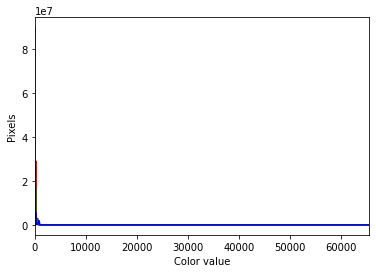

In [13]:
plot_rgb_hist(rgb_image_array, 65535)

In [8]:
#check max/min values)
#print(red.shape, green.shape, blue.shape)
print(red.max(),red.min())
print(green.max(),green.min())
print(blue.max(),blue.min())

1850 0
1804 0
2309 0


In [9]:
#calculate vaules of 95th percentile
red_95th = np.percentile(red,95)
green_95th = np.percentile(green,95)
blue_95th = np.percentile(blue,95)
print(red_95th,green_95th,blue_95th)

620.0 650.0 925.0


In [4]:
rgb_max_norm = max_norm(liebre1_image_path)
rgb_perc_norm = perc_norm(liebre1_image_path)

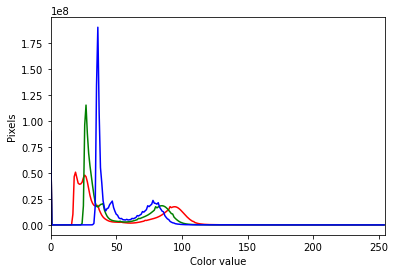

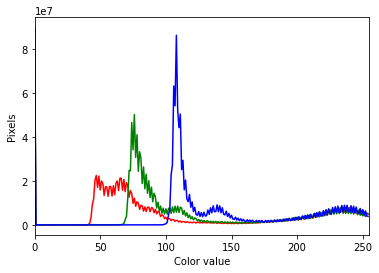

In [16]:
plot_rgb_hist(rgb_max_norm, 255)
plot_rgb_hist(rgb_perc_norm, 255)

In [5]:
uint8_max_norm = np.uint8(rgb_max_norm)
uint8_perc_norm = np.uint8(rgb_perc_norm)

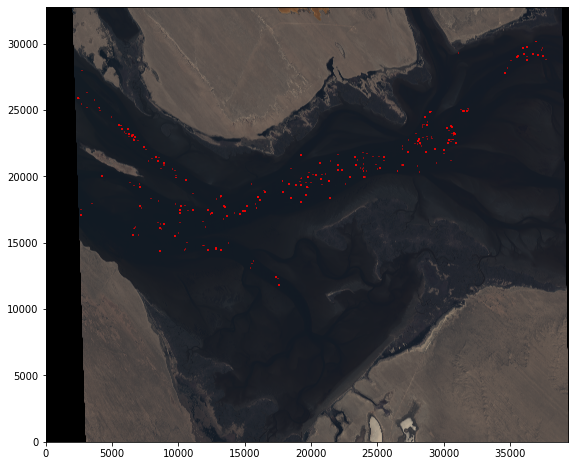

In [6]:
plot_rgb_boxes(liebre1_image_path, liebre1_box_path, uint8_max_norm)

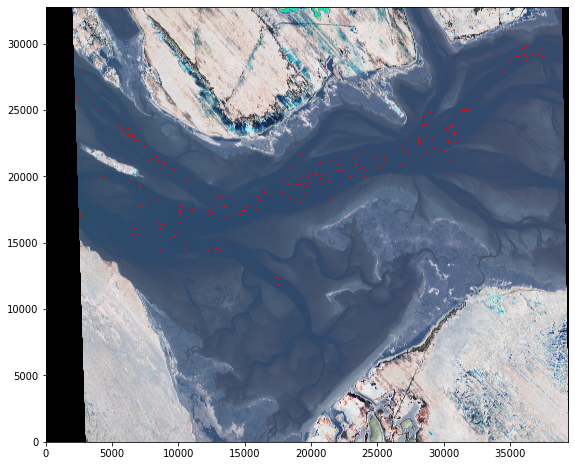

In [7]:
plot_rgb_boxes(liebre1_image_path, liebre1_box_path, uint8_perc_norm)

### Look at example cropped image for the percentile normalization

To do:

- change cropping and saving code into a function

In [31]:
from src.preprocessing.dataprocessing import convert_coords, save_files, read_coords

In [75]:
geotif = rasterio.open(liebre1_image_path)

In [76]:
file_save_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/norm_im_test"

<class 'PIL.Image.Image'>


KeyboardInterrupt: 

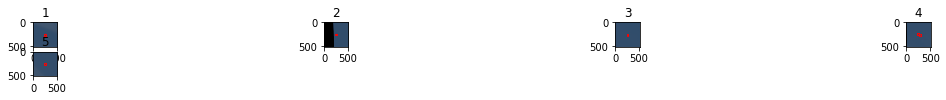

In [77]:
with open(liebre1_box_path, 'r') as f:
    label = json.load(f)
    image = PIL_image
    print(type(image))

    coords, centres = read_coords(label)
    
    # convert bounding box coordinates from geographic to image-scaled
    centres_converted = np.array([convert_coords(image, geotif, label, point[0], point[1]) for point in centres])
    
    coords_converted = np.array([[convert_coords(image, geotif, label, point[0][0], point[0][1]), 
                                  convert_coords(image, geotif, label, point[1][0], point[1][1])] 
                            for point in coords
                       ])    
    
    ## DB-Scan algorithm for clustering ##
    
    eps = 250 # threshold distance between two points to be in the same 'neighbourhood'
    dbscan = DBSCAN(min_samples=1, eps=eps)
    y = dbscan.fit_predict(centres_converted)

    # storing coordinates of clusters, relative to boundaries of image (not tile)
    info = {}
    for i in range(y.max()+1):
        
        # calculate the max and min coords of all the bounding boxes in the cluster
        box_centres = centres_converted[np.where(y==i)[0]]
        min_x, max_x = box_centres[:, 0].min(), box_centres[:, 0].max()
        min_y, max_y = box_centres[:, 1].min(), box_centres[:, 1].max()
        
        # assign each cluster of objects as an item
        item = {}
        item['centre'] = [(min_x+max_x)//2, (min_y+max_y)//2]
        item['object_boxes'] = coords_converted[np.where(y==i)[0]].tolist()
        item['name'] = "whale"
        info[i] = item
        
        # add a line here to generalize to multiple categories:
        # if label['features']['NumShip'] == ... : 

    save_files(image, label, info, file_save_path, 'liebre1norm')

In [8]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/norm_im_test/liebre1norm_0.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/norm_im_test/liebre1norm_0.txt"

In [9]:
cropped_image = Image.open(cropped_image_path)

In [10]:
import pandas as pd 
boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)

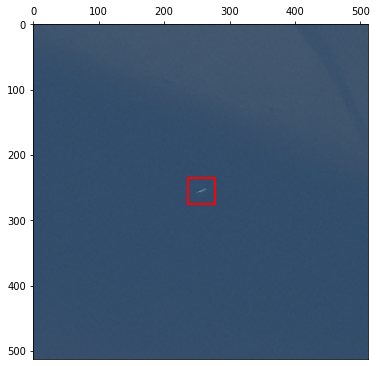

In [11]:
x = (boxes[1][0] - boxes[3][0]*0.5)*cropped_image.size[0]
y = (boxes[2][0] - boxes[4][0]*0.5)*cropped_image.size[1]
w = boxes[3][0] * cropped_image.size[0]
h = boxes[4][0] * cropped_image.size[1]
fig, ax = plt.subplots(figsize = (6,9))
ax.xaxis.tick_top()
ax.imshow(cropped_image)
ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

In [12]:
cropped_image_array = np.array(cropped_image)

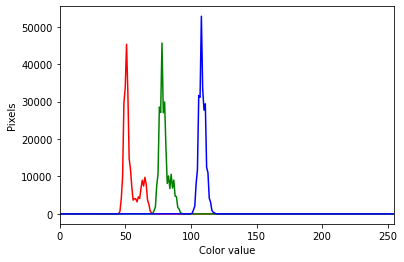

In [14]:
plot_rgb_hist(cropped_image_array, 255)

## Look at Liebre 2 image

In [3]:
liebre2_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre2pansharp.tif"
liebre2_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre2_boxes.geojson"

In [38]:
rgb_max_norm_l2 = max_norm(liebre2_image_path)
rgb_perc_norm_l2 = perc_norm(liebre2_image_path)

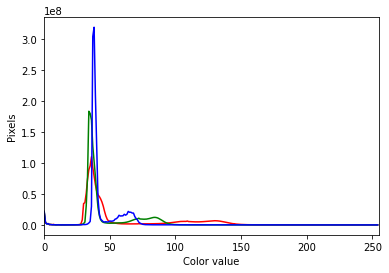

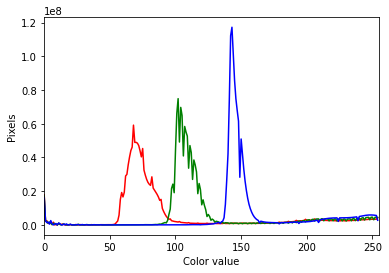

In [39]:
plot_rgb_hist(rgb_max_norm_l2, 255)
plot_rgb_hist(rgb_perc_norm_l2, 255)

In [40]:
uint8_max_norm_l2 = np.uint8(rgb_max_norm_l2)
uint8_perc_norm_l2 = np.uint8(rgb_perc_norm_l2)

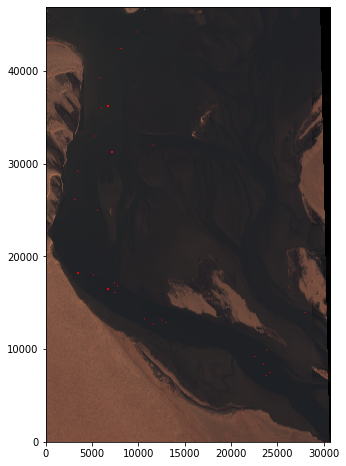

In [41]:
plot_rgb_boxes(liebre2_image_path, liebre2_box_path, uint8_max_norm_l2) 

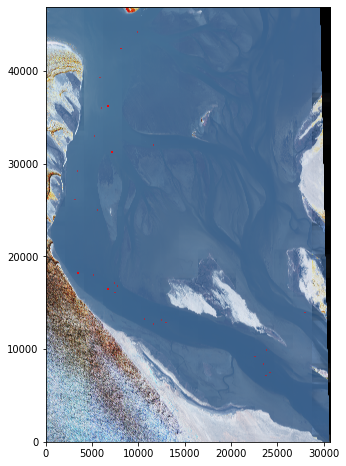

In [42]:
plot_rgb_boxes(liebre2_image_path, liebre2_box_path, uint8_perc_norm_l2)

## Look at San Ignacio image

In [15]:
sanig_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanigpansharp.tif"
sanig_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanig_boxes.geojson"

In [ ]:
rgb_max_norm_si = max_norm(sanig_image_path)
rgb_perc_norm_si = perc_norm(sanig_image_path)

In [ ]:
plot_rgb_hist(rgb_max_norm_si, 255)
plot_rgb_hist(rgb_perc_norm_si, 255)

In [ ]:
uint8_max_norm_l2 = np.uint8(rgb_max_norm_si)
uint8_perc_norm_l2 = np.uint8(rgb_perc_norm_si)

In [ ]:
plot_rgb_boxes(sanig_image_path, sanig_box_path, uint8_max_norm_si)

In [ ]:
plot_rgb_boxes(sanig_image_path, sanig_box_path, uint8_perc_norm_si)